<a href="https://colab.research.google.com/github/Joao-Alb/LIBRAS_training/blob/master/Proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from skimage.io import imshow
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.utils import img_to_array
from tensorflow.keras import layers, models
from keras.utils import np_utils
from imutils import paths
import random
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Endereçõ do diretorio do Dataset
path_dataset = "/content/drive/My Drive/BOM"

#Carrega a lista de labels
label_dict = {}
for i, d in enumerate(sorted(os.listdir(path_dataset))):
    label_dict[d] = i

print(label_dict)

#Calcula a quantidade de classes
num_classes = len(label_dict)

data = []

{'L': 0, 'M': 1, 'None': 2, 'O': 3}


In [ ]:
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(path_dataset)))
random.seed(42)
random.shuffle(imagePaths)
print(imagePaths)

['/content/drive/My Drive/BOM/M/4 (5).PNG', '/content/drive/My Drive/BOM/M/c19 (2).PNG', '/content/drive/My Drive/BOM/None/J9.png', '/content/drive/My Drive/BOM/O/11 (4).PNG', '/content/drive/My Drive/BOM/M/12 (1).PNG', '/content/drive/My Drive/BOM/L/0 (3).PNG', '/content/drive/My Drive/BOM/O/4 (3).PNG', '/content/drive/My Drive/BOM/L/1.PNG', '/content/drive/My Drive/BOM/None/J13.png', '/content/drive/My Drive/BOM/L/15 (4).PNG', '/content/drive/My Drive/BOM/M/3 (5).PNG', '/content/drive/My Drive/BOM/M/9 (2).PNG', '/content/drive/My Drive/BOM/L/15 (2).PNG', '/content/drive/My Drive/BOM/M/18 (2).PNG', '/content/drive/My Drive/BOM/M/6 (5).PNG', '/content/drive/My Drive/BOM/M/14 (2).PNG', '/content/drive/My Drive/BOM/O/7 (4).PNG', '/content/drive/My Drive/BOM/L/14 (3).PNG', '/content/drive/My Drive/BOM/L/2 (4).PNG', '/content/drive/My Drive/BOM/M/18 (4).PNG', '/content/drive/My Drive/BOM/L/1 (4).PNG', '/content/drive/My Drive/BOM/O/8 (3).PNG', '/content/drive/My Drive/BOM/O/17 (4).PNG', '/

In [ ]:
labels = []

print("[INFO] loading images...")
# loop over the input images
for imagePath in tqdm(imagePaths):
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (50, 50))
    #Converts Image instance to a Numpy array
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = label_dict[imagePath.split(os.path.sep)[-2]]
    labels.append(label)

[INFO] loading images...


100%|██████████| 411/411 [00:01<00:00, 316.34it/s]


In [ ]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(train_images, test_images, train_l, test_l) = train_test_split( data, labels, test_size=0.25, random_state=42)

# convert the labels from integers to vectors
train_labels = np_utils.to_categorical(train_l, num_classes=num_classes)
test_labels = np_utils.to_categorical(test_l, num_classes=num_classes)

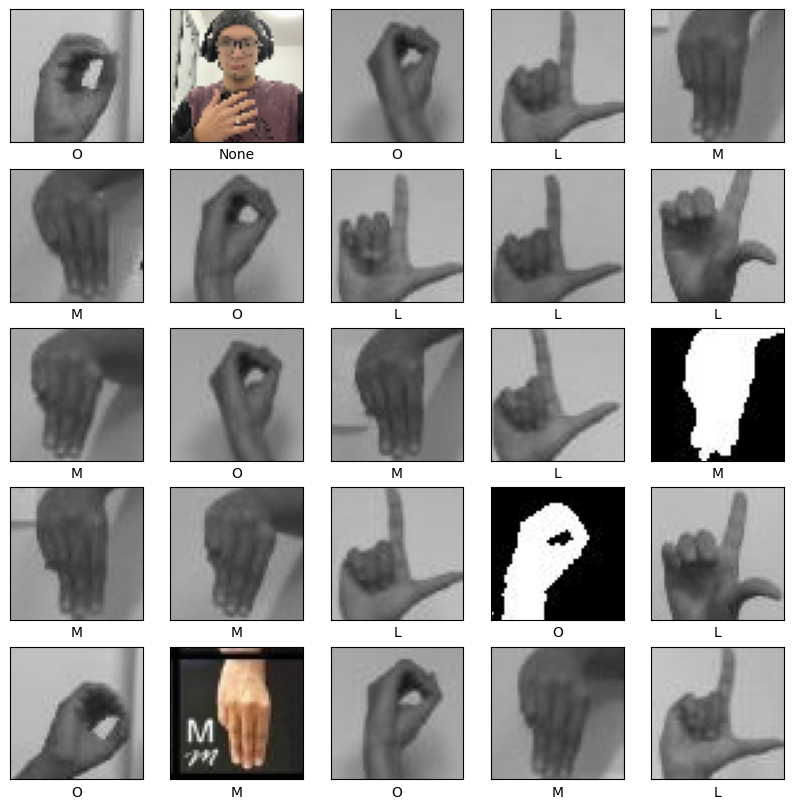

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img_float32 = np.float32(train_images[i])
    plt.imshow(cv2.cvtColor(img_float32, cv2.COLOR_BGR2RGB) )
    # labels
    plt.xlabel( [k for k, v in label_dict.items() if v == train_l[i]][0] )
plt.show()

In [ ]:
data.shape
data.shape[1]

50

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 128)         147584    
                                                                 
 flatten_2 (Flatten)         (None, 10368)            

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_l, epochs=500, batch_size=50,
                    validation_data=(test_images, test_l))

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 3s 113ms/step - loss: 1.3371 - accuracy: 0.3442 - val_loss: 1.2873 - val_accuracy: 0.2718
Epoch 2/500
7/7 [==============================] - 0s 19ms/step - loss: 1.2064 - accuracy: 0.4188 - val_loss: 1.0804 - val_accuracy: 0.5146
Epoch 3/500
7/7 [==============================] - 0s 19ms/step - loss: 0.8409 - accuracy: 0.7532 - val_loss: 0.7396 - val_accuracy: 0.8155
Epoch 4/500
7/7 [==============================] - 0s 19ms/step - loss: 0.3961 - accuracy: 0.9123 - val_loss: 0.4064 - val_accuracy: 0.9223
Epoch 5/500
7/7 [==============================] - 0s 19ms/step - loss: 0.1364 - accuracy: 0.9708 - val_loss: 0.4891 - val_accuracy: 0.9417
Epoch 6/500
7/7 [==============================] - 0s 19ms/step - loss: 0.0876 - accuracy: 0.9643 - val_loss: 0.5008 - val_accuracy: 0.9417
Epoch 7/500
7/7 [==============================] - 0s 19ms/step - loss: 0.0486 - accuracy: 0.9903 - val_loss: 0.5652 - val_accuracy: 0.9515
Epoch 8/500
7/7 [==============

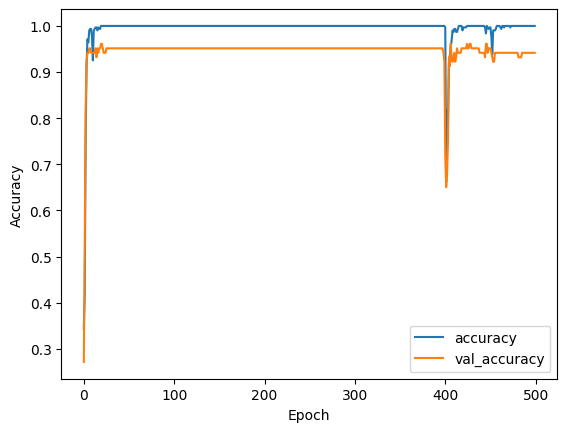

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

In [ ]:
print("Generating test predictions...")
predict_x=model.predict(test_images)
print(np.around(predict_x, 2))

# make class predictions
predictions = (predict_x > 0.5).astype(int)

y_pred_class = np.argmax(predictions, axis=1)
y_test_class = np.argmax(test_labels, axis=1)

for i in range(len(test_labels)):
	if y_pred_class[i] == y_test_class[i]:
		print(f'\033[92m {y_pred_class[i]} (expected {y_test_class[i]})')
	else:
		print(f'\033[91m {y_pred_class[i]} (expected {y_test_class[i]})')

Generating test predictions...
4/4 [==============================] - 0s 27ms/step
[[0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1. 

In [ ]:
model.save('/content/drive/My Drive/ModelIA')

In [ ]:
# Avaliando a acurácia com as imagens de Teste
l = len(y_test_class)
acc = sum([y_pred_class[i]==y_test_class[i] for i in range(l)])/l
print('Accuracy: %.2f %%' % (acc*100))

Accuracy: 94.17 %


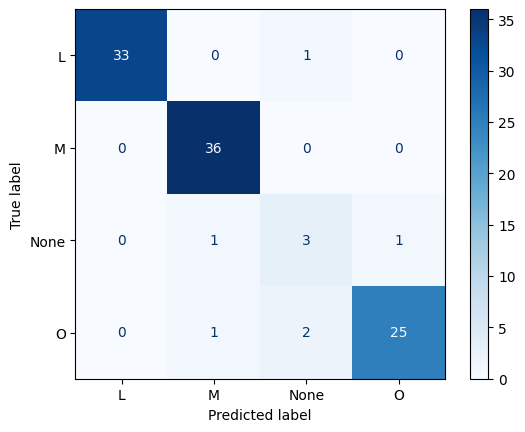

In [ ]:
# voltando pro formato de classes
y_pred = np.argmax(predictions, axis=1)
y_test_c = np.argmax(test_labels, axis=1)

#Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_dict)
disp.plot(cmap=plt.cm.Blues)